**Predicting the quality of wine using regression**

For this project we will be using this "Red Wine Quality" dataset found on Kaggle.
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

Original dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

This dataset contains 1600 rows of chemical/sensory inputs (related to red and white variants of the Portuguese "Vinho Verde" wine) that might affect the critical rating of a wine, as well as the quality score that each wine recieved on a scale of 1 to 10. 

How do the physicochemical properties of a given bottle of wine affect the critical score given it?

To answer this question, we will build a regression model to predict the quality of a given wine (values ranging from 1 to 10) given the different chemical/sensory inputs (eg.- volatile acidity, residual sugar, pH, etc.).


Here we load/install all of the libraries needed for visualizations and our prediction models.

In [3]:
install.packages("GGally")

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
library(tidyverse)
library(digest)
library(repr)
library(tidymodels)
library(cowplot)
library(GGally)
options(repr.matrix.max.rows = 6)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

We needed to change the names of the columns because some contained spaces which aren't allowed when you're trying to enter variables into R functions. We also used read_csv to load the data which was downloaded from kaggle and then uploaded into the jupyter notebook folder (and then pushed to the github repository).

In [7]:
names <- c("fixed_acidity","volatile_acidity","citric_acid","residual_sugar","chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol","quality")


# need to add url?

wine <- read_csv("winequality-red.csv", col_names = names, skip = 1)
wine

Parsed with column specification:
cols(
  fixed_acidity = col_double(),
  volatile_acidity = col_double(),
  citric_acid = col_double(),
  residual_sugar = col_double(),
  chlorides = col_double(),
  free_sulfur_dioxide = col_double(),
  total_sulfur_dioxide = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double()
)



fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.3,0.510,0.13,2.3,0.076,29,40,0.99574,3.42,0.75,11.0,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5
6.0,0.310,0.47,3.6,0.067,18,42,0.99549,3.39,0.66,11.0,6


**Possible predictor variables:**
Fixed acidity, pH, Volatile acidity, Citric acid, Residual sugar, Chlorides, Free sulphur dioxide, Total sulphur dioxide, Density, Sulphates, Alcohol

**Prediction variable:**
Quality

Here the data is split into the training and testing data - we have to do this now because to accurately visualize the relationships between the variables and quality we have to use only the data we are going to train the model on.

In [12]:
wine_split <- initial_split(wine, prop = 0.75, strata = quality)  
wine_train <- training(wine_split)   
wine_test <- testing(wine_split)
wine_train


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.2,0.600,0.08,2.0,0.090,32,44,0.99490,3.45,0.58,10.5,5
5.9,0.550,0.10,2.2,0.062,39,51,0.99512,3.52,0.76,11.2,6
5.9,0.645,0.12,2.0,0.075,32,44,0.99547,3.57,0.71,10.2,5


All of the possible predictors have a certain correlation and influence in determining the quality of wine, but which ones have the strongest correlation and therefore are ideal to use?

We used the ggpairs function to determine relationship between quality and all the other variables to find out what variables we should take into consideration. 

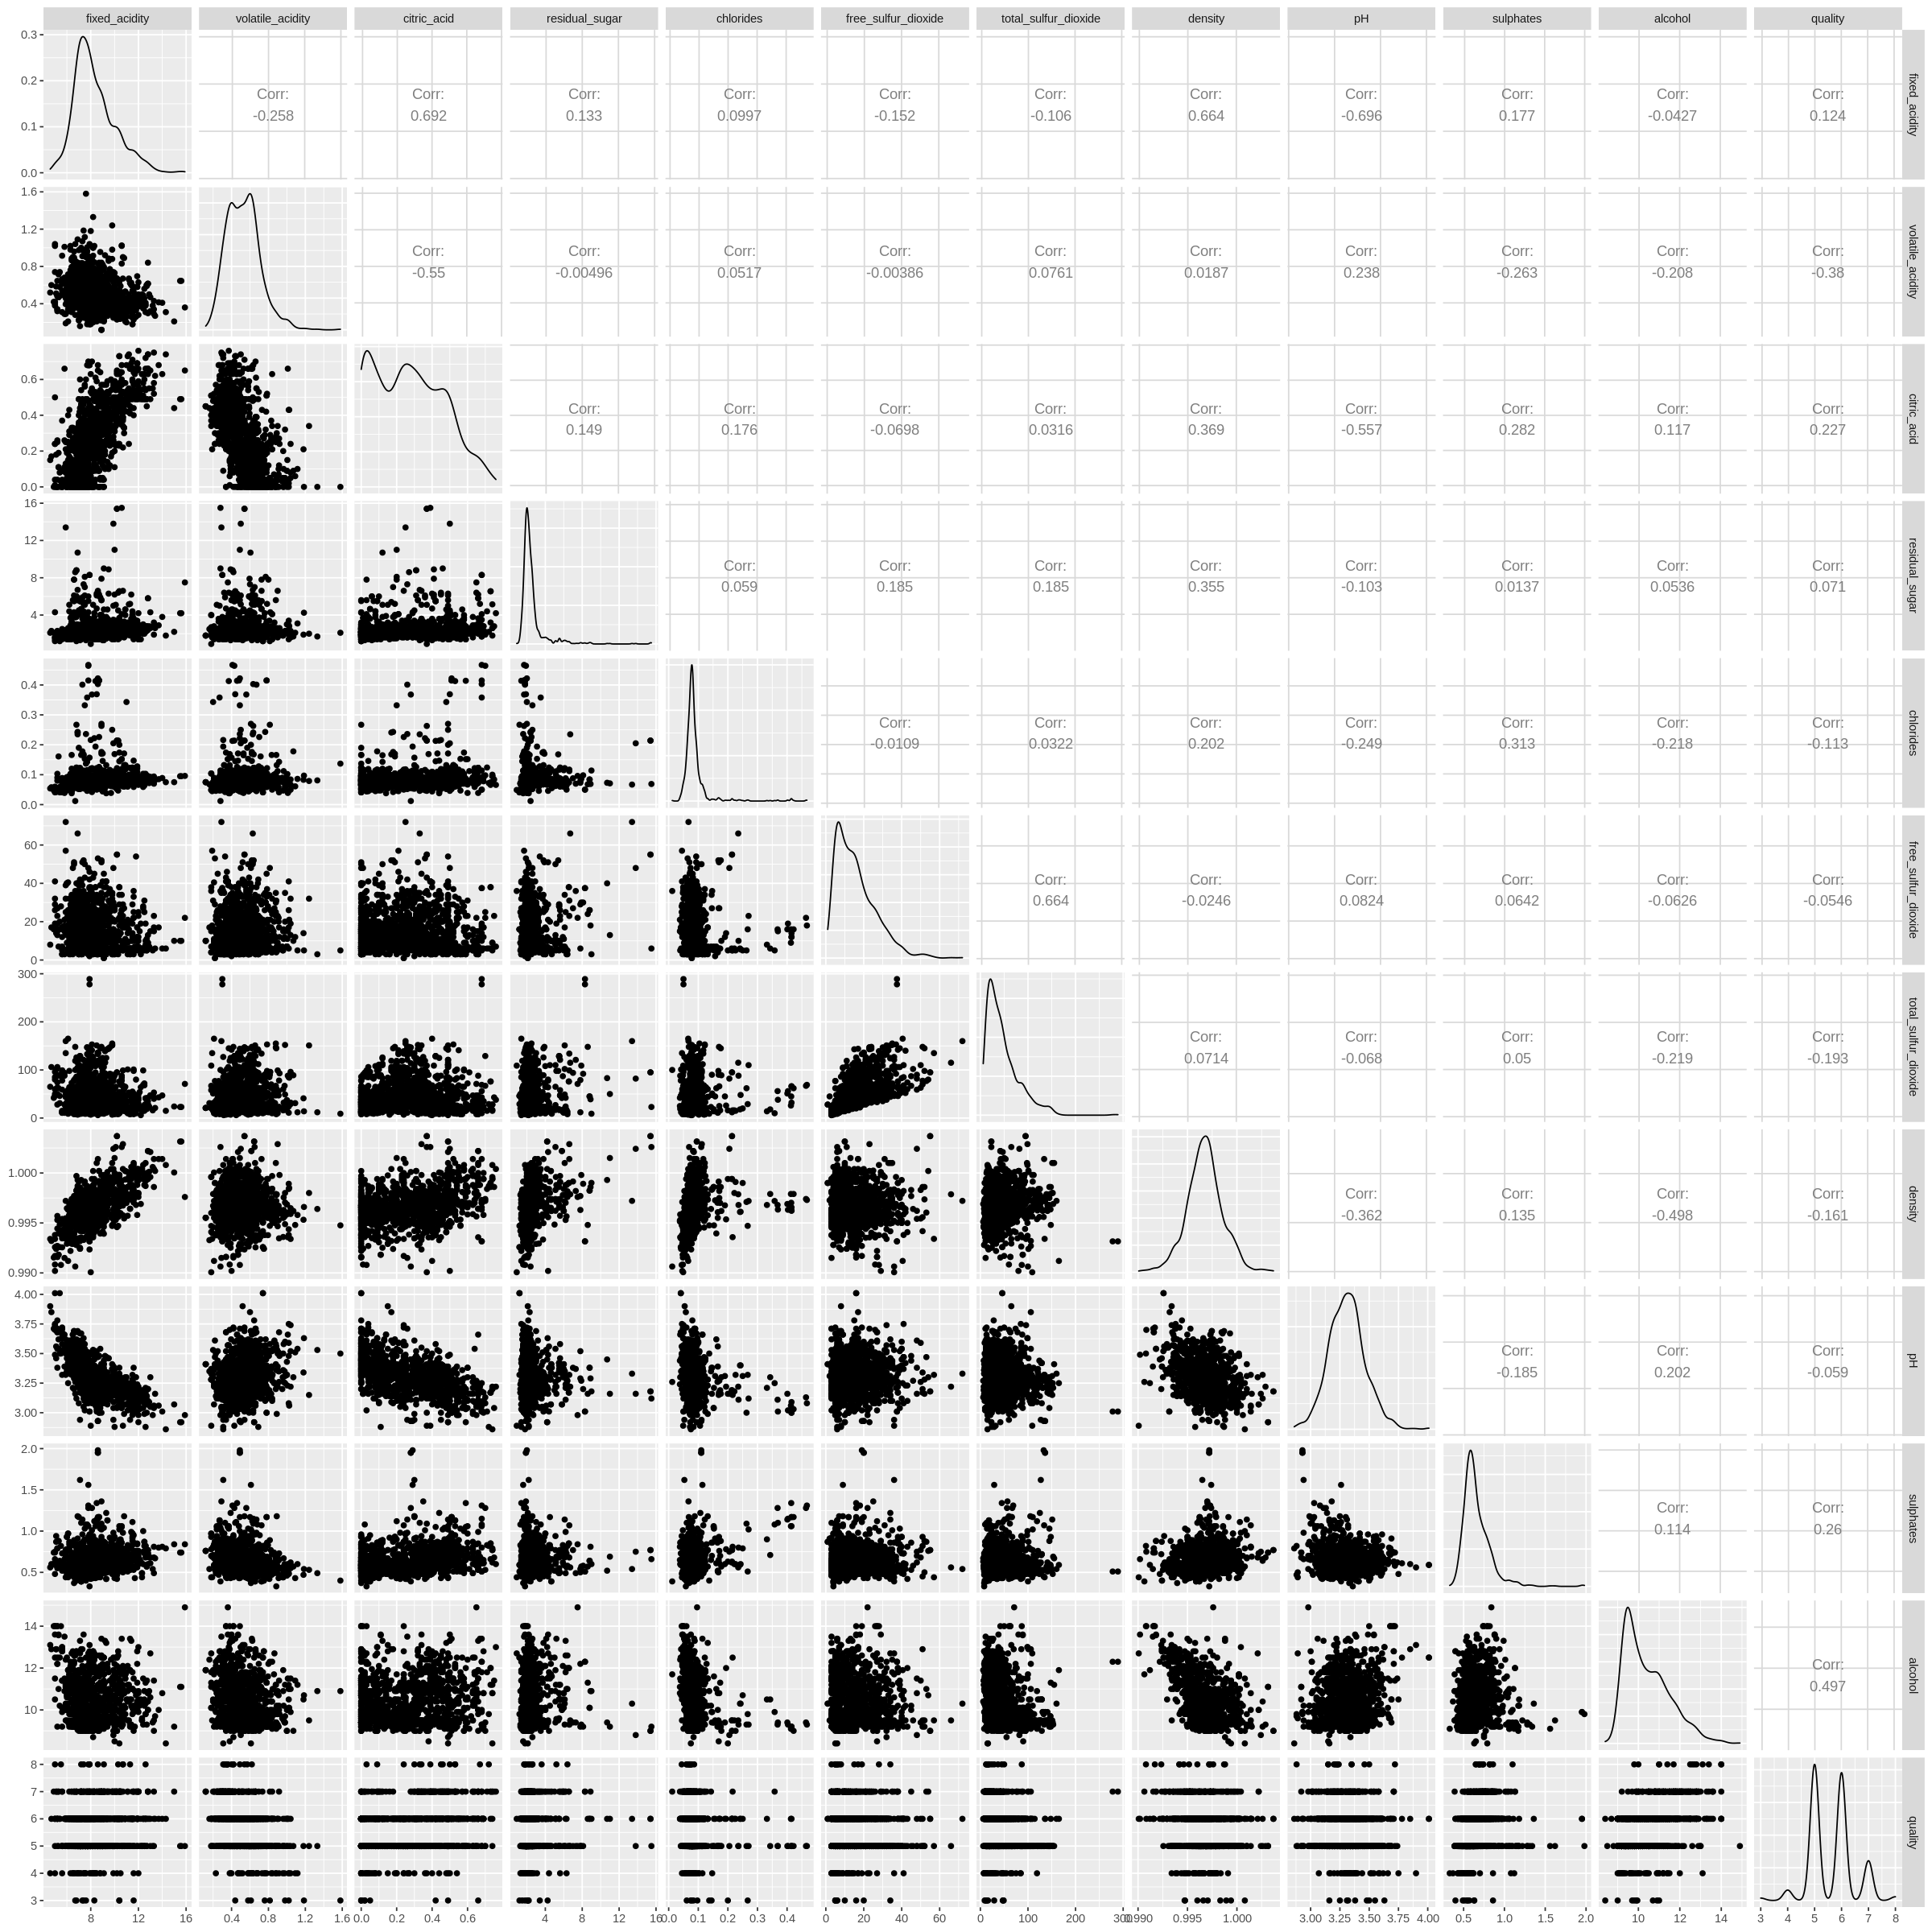

In [11]:
options(repr.plot.width = 20, repr.plot.height = 20)

ggpairs(wine_train)


We decided to choose the 3 variables that show a correlation above 25% (shown in the rightmost column). 
They are:
1. Alcohol content (positive correlation of 49.7%)
2. Volatile acidity (negative correlation of 38%)
3. Sulphates (positive correlation of 26%)


We will use these trends observed in the data to predict the quality of wine using  knn-nearest neighbors classification models (to obtain the lowest RMSPE). However, visualization of our results will be difficult, considering the fact that we are using 3 predictor variables. We would need a way to make a 4d visualization, which may not be attainable. One possibility is to train the model on one predictor variable at a time and compare the 2d plots that will be created.

The impact that our findings could have are:
We could find out which variables most affect the quality of a wine based on the preliminary data analysis. Also, wine manufacturers could use our model to estimate the quality of a wine they have created and try to alter manufacturing processes to make higher quality (and therefore more expensive) wine.

Future questions this exploration could lead to are:
How does wine quality affect the price of wine?
How does quality affect the popularity of certain kinds of wine?


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


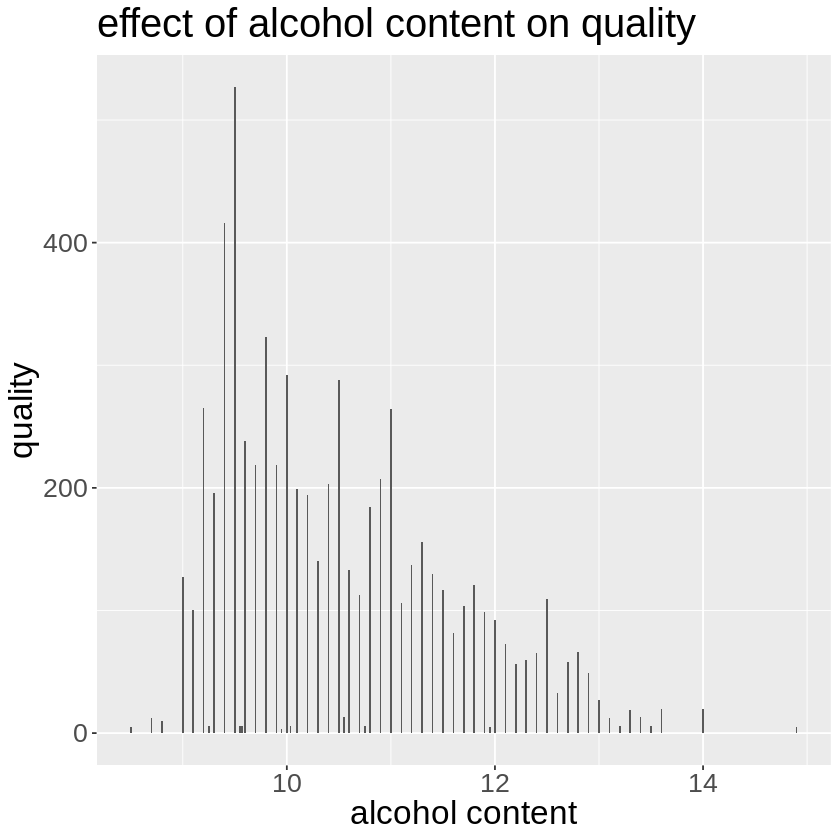

In [11]:
visualization_one <- ggplot(wine_train, aes(x = alcohol, y = quality))+
    geom_histogram(binwidth = 1, stat = "identity")+
    xlab("alcohol content")+
    ylab("quality")+
    theme(text = element_text(size = 20))+
    ggtitle("effect of alcohol content on quality")
visualization_one

In [10]:
?geom_histogram

geom_freqpoly {ggplot2},R Documentation
mapping,"Set of aesthetic mappings created by aes() or aes_(). If specified and inherit.aes = TRUE (the default), it is combined with the default mapping at the top level of the plot. You must supply mapping if there is no plot mapping."
data,"The data to be displayed in this layer. There are three options: If NULL, the default, the data is inherited from the plot data as specified in the call to ggplot(). A data.frame, or other object, will override the plot data. All objects will be fortified to produce a data frame. See fortify() for which variables will be created. A function will be called with a single argument, the plot data. The return value must be a data.frame, and will be used as the layer data. A function can be created from a formula (e.g. ~ head(.x, 10))."
position,"Position adjustment, either as a string, or the result of a call to a position adjustment function."
...,"Other arguments passed on to layer(). These are often aesthetics, used to set an aesthetic to a fixed value, like colour = ""red"" or size = 3. They may also be parameters to the paired geom/stat."
na.rm,"If FALSE, the default, missing values are removed with a warning. If TRUE, missing values are silently removed."
show.legend,"logical. Should this layer be included in the legends? NA, the default, includes if any aesthetics are mapped. FALSE never includes, and TRUE always includes. It can also be a named logical vector to finely select the aesthetics to display."
inherit.aes,"If FALSE, overrides the default aesthetics, rather than combining with them. This is most useful for helper functions that define both data and aesthetics and shouldn't inherit behaviour from the default plot specification, e.g. borders()."
binwidth,"The width of the bins. Can be specified as a numeric value or as a function that calculates width from unscaled x. Here, ""unscaled x"" refers to the original x values in the data, before application of any scale transformation. When specifying a function along with a grouping structure, the function will be called once per group. The default is to use the number of bins in bins, covering the range of the data. You should always override this value, exploring multiple widths to find the best to illustrate the stories in your data. The bin width of a date variable is the number of days in each time; the bin width of a time variable is the number of seconds."
bins,Number of bins. Overridden by binwidth. Defaults to 30.
orientation,"The orientation of the layer. The default (NA) automatically determines the orientation from the aesthetic mapping. In the rare event that this fails it can be given explicitly by setting orientation to either ""x"" or ""y"". See the Orientation section for more detail."
